<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/Lesson_24_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from google.colab import drive

In [2]:
drive.mount()
df = pd.read_csv()

Mounted at /content/drive


In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,kmeans_cluster,dbscan_cluster
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,1,0


In [6]:
# Предобработка данных
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df = df.dropna()

In [7]:
# Кодирование категориальных переменных
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [8]:
# Нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [9]:
# K-means кластеризация
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['kmeans_cluster'] = kmeans_labels

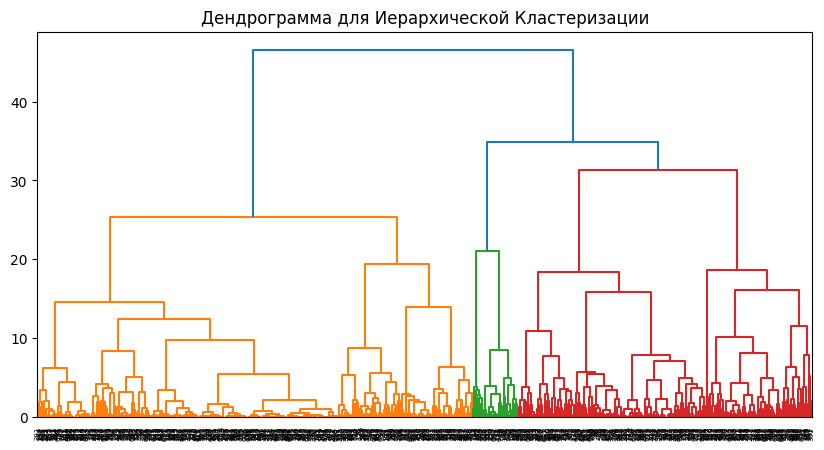

In [10]:
# Иерархическая кластеризация
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Дендрограмма для Иерархической Кластеризации')
plt.show()

In [28]:
# DBSCAN кластеризация
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)
df['dbscan_cluster'] = dbscan_labels

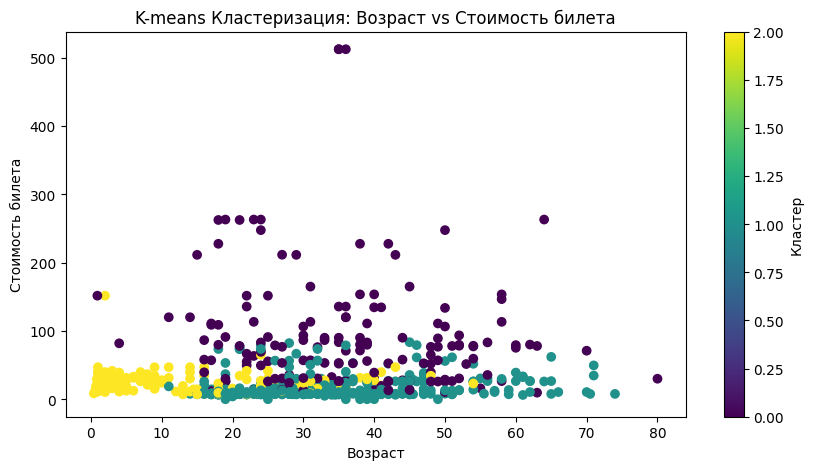

In [29]:
# Визуализация K-means
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['Fare'], c=kmeans_labels, cmap='viridis')
plt.title('K-means Кластеризация: Возраст vs Стоимость билета')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.colorbar(label='Кластер')
plt.show()

В кластеризации K-means видно, что выявлено 3 основные группы.  Один кластер (фиолетового цвета) содержит в основном пассажиров с высокими ценами на билеты и в основном это люди старшего возраста. Данный кластер относится скорее всего к пассажирам 1 класса. Кластер (зеленого цвета) скорее всего относится к пассажирам 3 класса. Видны относительно чёткие границы между кластерами, что свидетельствует о хорошей сегментации.

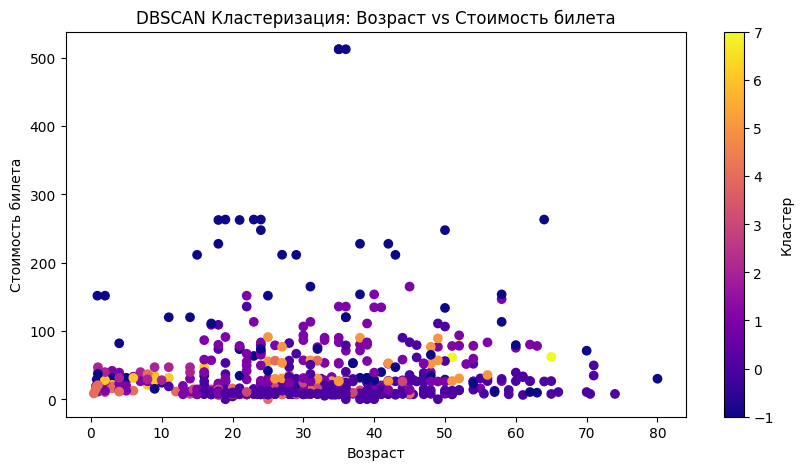

In [16]:
# Визуализация DBSCAN
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['Fare'], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Кластеризация: Возраст vs Стоимость билета')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.colorbar(label='Кластер')
plt.show()

В кластеризации DBSCAN видно, что присутствуют выбросы. В данном случаи DBSCAN отнес к выбросам клиентов, с высокими тарифами. Также выбросы проявляются среди пожилых людей

In [17]:
# Поиск оптимальных параметров DBSCAN
silhouette_coefficients = {}
best_score = -1
best_params = None

In [30]:
# Начинаем с минимума 2 кластеров, так как для одного кластера силуэтный коэффициент не определен
for j in tqdm(range(5, 30)):
    for k in range(5, 300, 1):
        epsilon = k / 1000
        dbscan = DBSCAN(eps=epsilon, min_samples=j)
        clusters = dbscan.fit_predict(scaled_data)
        try:
            score = silhouette_score(scaled_data, clusters)
            silhouette_coefficients[epsilon] = {j, score}
        except:
            continue
        if score > best_score:
            best_score = score
            best_params = (epsilon, j)

print(f'Лучшие параметры DBSCAN: eps={best_params[0]}, min_samples={best_params[1]} с силуэтным коэффициентом {best_score}')


100%|██████████| 25/25 [02:44<00:00,  6.56s/it]

Лучшие параметры DBSCAN: eps=0.277, min_samples=21 с силуэтным коэффициентом 0.05568417186788502


In [27]:
silhouette_coefficients

{0.005: {np.float64(-0.23244911119560152), 8},
 0.006: {np.float64(-0.23244911119560152), 8},
 0.007: {np.float64(-0.23244911119560152), 8},
 0.008: {np.float64(-0.22979361487426128), 9},
 0.009: {np.float64(-0.22979361487426128), 9},
 0.01: {np.float64(-0.22706575318233377), 9},
 0.011: {np.float64(-0.23219512159026662), 10},
 0.012: {np.float64(-0.2080743751344254), 10},
 0.013: {np.float64(-0.2080743751344254), 10},
 0.014: {np.float64(-0.22442066083789983), 11},
 0.015: {np.float64(-0.22442066083789983), 11},
 0.016: {np.float64(-0.22442066083789983), 11},
 0.017: {np.float64(-0.22442066083789983), 11},
 0.018: {np.float64(-0.20630911366233182), 11},
 0.019: {np.float64(-0.20630911366233182), 11},
 0.02: {np.float64(-0.20630911366233182), 11},
 0.021: {np.float64(-0.20630911366233182), 11},
 0.022: {np.float64(-0.20630911366233182), 11},
 0.023: {np.float64(-0.20630911366233182), 11},
 0.024: {np.float64(-0.20630911366233182), 11},
 0.025: {np.float64(-0.22700895127342657), 12},
 0

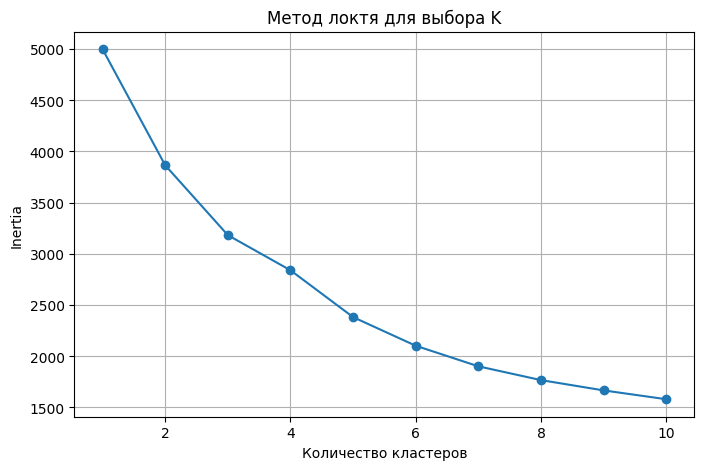

In [23]:
# Метод локтя для K-means
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод локтя для выбора K')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.grid()
plt.show()